In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

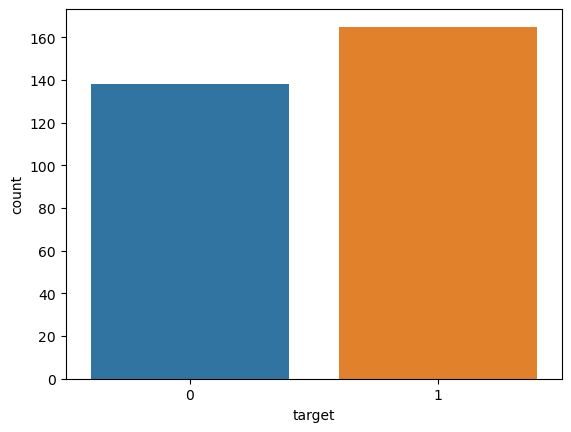

In [6]:
sns.countplot(data = data , x = 'target')

<Axes: xlabel='sex', ylabel='count'>

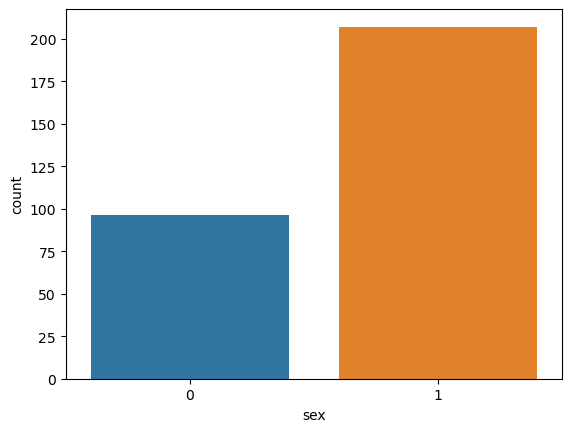

In [7]:
sns.countplot(data = data , x = 'sex')

<Axes: >

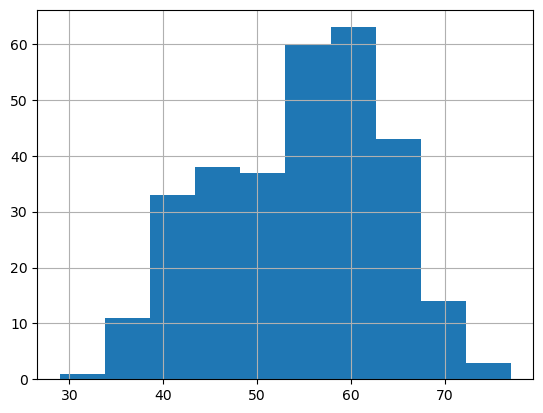

In [7]:
data['age'].hist()

In [8]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

In [9]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
X[:, 10] = le.fit_transform(X[:, 10])
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer([('SL', OneHotEncoder(), [10])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[1. , 0. , 0. , ..., 2.3, 0. , 1. ],
       [1. , 0. , 0. , ..., 3.5, 0. , 2. ],
       [0. , 0. , 1. , ..., 1.4, 0. , 2. ],
       ...,
       [0. , 1. , 0. , ..., 3.4, 2. , 3. ],
       [0. , 1. , 0. , ..., 1.2, 1. , 3. ],
       [0. , 1. , 0. , ..., 0. , 1. , 2. ]])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 3.66450153, -0.92676626, -0.93914194, ...,  1.08733806,
        -0.71442887, -2.14887271],
       [ 3.66450153, -0.92676626, -0.93914194, ...,  2.12257273,
        -0.71442887, -0.51292188],
       [-0.27288841, -0.92676626,  1.06480177, ...,  0.31091206,
        -0.71442887, -0.51292188],
       ...,
       [-0.27288841,  1.07902072, -0.93914194, ...,  2.03630317,
         1.24459328,  1.12302895],
       [-0.27288841,  1.07902072, -0.93914194, ...,  0.13837295,
         0.26508221,  1.12302895],
       [-0.27288841,  1.07902072, -0.93914194, ..., -0.89686172,
         0.26508221, -0.51292188]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=380)

### KNeighbors

In [18]:

from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn import metrics

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer


In [27]:
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=3, scoring='f1', return_train_score=False,verbose=10)
grid_search=grid.fit(x_train, y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[CV 1/3; 1/29] START n_neighbors=1..............................................
[CV 1/3; 1/29] END ...............n_neighbors=1;, score=0.767 total time=   0.0s
[CV 2/3; 1/29] START n_neighbors=1..............................................
[CV 2/3; 1/29] END ...............n_neighbors=1;, score=0.780 total time=   0.0s
[CV 3/3; 1/29] START n_neighbors=1..............................................
[CV 3/3; 1/29] END ...............n_neighbors=1;, score=0.744 total time=   0.0s
[CV 1/3; 2/29] START n_neighbors=2..............................................
[CV 1/3; 2/29] END ...............n_neighbors=2;, score=0.773 total time=   0.0s
[CV 2/3; 2/29] START n_neighbors=2..............................................
[CV 2/3; 2/29] END ...............n_neighbors=2;, score=0.773 total time=   0.0s
[CV 3/3; 2/29] START n_neighbors=2..............................................
[CV 3/3; 2/29] END ...............n_neighbors=2;

In [28]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=24)

In [29]:
grid.best_params_

{'n_neighbors': 24}

In [30]:
grid.best_score_

0.8468530886072116

In [31]:
sss = KNeighborsClassifier(n_neighbors=24)
sss.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [32]:
y_pred = sss.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [22]:
knn = KNeighborsClassifier()
scorer = make_scorer(recall_score, pos_label=1)
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
grid1 = GridSearchCV(knn, param_grid, cv=3, scoring=scorer, return_train_score=False,verbose=10)
grid1_search=grid1.fit(x_train, y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[CV 1/3; 1/29] START n_neighbors=1..............................................
[CV 1/3; 1/29] END ...............n_neighbors=1;, score=0.805 total time=   0.0s
[CV 2/3; 1/29] START n_neighbors=1..............................................
[CV 2/3; 1/29] END ...............n_neighbors=1;, score=0.780 total time=   0.0s
[CV 3/3; 1/29] START n_neighbors=1..............................................
[CV 3/3; 1/29] END ...............n_neighbors=1;, score=0.725 total time=   0.0s
[CV 1/3; 2/29] START n_neighbors=2..............................................
[CV 1/3; 2/29] END ...............n_neighbors=2;, score=0.707 total time=   0.0s
[CV 2/3; 2/29] START n_neighbors=2..............................................
[CV 2/3; 2/29] END ...............n_neighbors=2;, score=0.707 total time=   0.0s
[CV 3/3; 2/29] START n_neighbors=2..............................................
[CV 3/3; 2/29] END ...............n_neighbors=2;

In [24]:
grid1.best_params_

{'n_neighbors': 27}

In [25]:
grid1.best_score_

0.9345528455284553

In [26]:
sss1 = KNeighborsClassifier(n_neighbors=27)
sss1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [27]:
y_pred = sss1.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### SVC

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params = {
    'C':range(1,100),
    'kernel':['linear', 'rbf'],
    'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 0.5]

}
gsh = GridSearchCV(SVC(), param_grid= params, scoring='f1', cv=3, n_jobs=-1, verbose=10)

In [31]:
gsh.fit(x_train,y_train)

Fitting 3 folds for each of 1188 candidates, totalling 3564 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 100),
                         'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=10)

In [32]:
gsh.best_estimator_

SVC(C=9, gamma=0.001)

In [33]:
gsh.best_score_

0.8631580002305036

In [34]:
gsh.best_params_

{'C': 9, 'gamma': 0.001, 'kernel': 'rbf'}

In [35]:
svc = SVC(C = 9, gamma= 0.001, kernel= 'rbf')
svc.fit(x_train,y_train)

SVC(C=9, gamma=0.001)

In [36]:
y_pred = svc.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### recall

In [37]:
params = {
    'C':[0.1, 1, 5, 10, 15, 100],
    'kernel':['linear', 'rbf'],
    'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 0.5]

}
scorer = make_scorer(recall_score, pos_label=1)
gshh = GridSearchCV(SVC(), param_grid= params, scoring=scorer, cv=3, n_jobs=-1, verbose=10)

In [38]:
gshh.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 15, 100],
                         'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(recall_score, pos_label=1), verbose=10)

In [39]:
gshh.best_estimator_

SVC(C=0.1, gamma=0.0001)

In [40]:
gshh.best_score_

1.0

In [41]:
gshh.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [42]:
svc1 = SVC(C = 0.1, gamma= 0.0001, kernel= 'rbf')
svc1.fit(x_train,y_train)

SVC(C=0.1, gamma=0.0001)

In [43]:
y_pred = svc1.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.57      1.00      0.72        43

    accuracy                           0.57        76
   macro avg       0.28      0.50      0.36        76
weighted avg       0.32      0.57      0.41        76



c:\Users\Bastani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bastani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bastani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
decision_tree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

param_dict = {
    "criterion" : ['gini', 'entropy'],
    #"splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10],
    #"min_samples_split" : range(1,10),
    #"min_samples_leaf" :range(1,5)
}
grida1 = GridSearchCV(decision_tree, param_grid = param_dict, cv=3, scoring='f1', n_jobs = -1 ,verbose=10)


In [147]:
grida1.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1', verbose=10)

In [148]:
grida1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [149]:
grida1.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [150]:
grida1.best_score_

0.7604890018022713

In [151]:
mmm = DecisionTreeClassifier(criterion = "entropy" , max_depth=3)
mmm.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [152]:
y_pred = mmm.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.78      0.81      0.80        43

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



### recall

In [142]:
decision_tree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

param_dict = {
    "criterion" : ['gini', 'entropy'],
    #"splitter" : ["best", "random"],
    "max_depth" : range(1,10),
    #"min_samples_split" : [2, 5, 10],
    #"min_samples_leaf" : [1,2,4]
}
scorer = make_scorer(recall_score, pos_label=1)
grida2 = GridSearchCV(decision_tree, param_grid = param_dict, cv=3, scoring= scorer ,n_jobs = -1, verbose=10)


In [143]:
grida2.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             scoring=make_scorer(recall_score, pos_label=1), verbose=10)

In [144]:
grida2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [145]:
grida2.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [139]:
grida2.best_score_

0.7945121951219513

In [140]:
mmmm = DecisionTreeClassifier(criterion = "entropy" , max_depth=3)
mmmm.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [141]:
y_pred = mmmm.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.78      0.81      0.80        43

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



### RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
param_dictt = {
    'max_depth':range(1,11),
    'n_estimators':[10,100,200,300],
    'max_features':['sqrt', 'log2', None],
    #'min_samples_leaf':[1,2,3],
    #'min_samples_split':[1,2,3]
}
grida3 = GridSearchCV(rfc, param_grid = param_dictt, cv=3, scoring='f1', n_jobs = -1 ,verbose=10)


In [121]:
grida3.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 100, 200, 300]},
             scoring='f1', verbose=10)

In [122]:
grida3.best_estimator_

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=200)

In [123]:
grida3.best_params_

{'max_depth': 1, 'max_features': 'log2', 'n_estimators': 200}

In [124]:
grida3.best_score_

0.8519938312403612

In [125]:
mn = RandomForestClassifier( n_estimators= 200, max_features='log2', max_depth=1)
mn.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=200)

In [126]:
y_pred = mn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



### recall


In [129]:
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
param_dictt = {
    'max_depth':range(1,11),
    'n_estimators':[10,100,200,300],
    'max_features':['sqrt', 'log2', None],
    #'min_samples_leaf':[1,2,3],
    #'min_samples_split':[1,2,3]
}
scorer = make_scorer(recall_score, pos_label=1)
grida4 = GridSearchCV(rfc, param_grid = param_dictt, cv=3, scoring=scorer, n_jobs = -1 ,verbose=10)

In [130]:
grida4.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 100, 200, 300]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=10)

In [131]:
grida4.best_params_

{'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 200}

In [132]:
grida4.best_score_

0.9099593495934958

In [133]:
n = RandomForestClassifier( n_estimators= 200, max_features='sqrt', max_depth=1)
n.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=200)

In [134]:
y_pred = n.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76

